In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs

In [2]:
# train = pd.read_csv("C:/WORK/AI SPAKR 경진대회/data/train_data.csv")
# test = pd.read_csv("C:/WORK/AI SPAKR 경진대회/data/test_data.csv")

In [3]:
train = pd.read_csv("D:/WORK/수원대학교/spark ai/data/train_data.csv")
test = pd.read_csv("D:/WORK/수원대학교/spark ai/data/test_data.csv")
submission = pd.read_csv("D:/WORK/수원대학교/spark ai/data/answer_sample.csv")

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   float64
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     7389 non-null   float64
 1   air_end_temp   7389 non-null   float64
 2   out_pressure   7389 non-null   float64
 3   motor_current  7389 non-null   float64
 4   motor_rpm      7389 non-nul

(None, None)

In [5]:
train_scaled = StandardScaler().fit_transform(train)
train_pca = PCA(n_components=2)
train_pca.fit(train_scaled)
train_pca = train_pca.transform(train_scaled)
print(train_pca.shape)

(2463, 2)


In [6]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
svm.fit(train)
pred = svm.predict(train)

In [7]:
anom_index = np.where(pred==-1)
anom_index

(array([  74,  114,  186,  214,  585,  592,  595,  596,  801,  802,  804,
         809,  811,  812,  816,  823,  824,  825,  830,  835,  837,  838,
         840,  841,  842,  843,  850,  854,  857,  859,  862,  863,  864,
         870,  873,  875,  878,  879,  882,  883,  884,  890,  891,  893,
         894,  897,  900,  905,  906,  907,  908,  916,  919,  936,  937,
         938,  941,  942,  944,  947,  948,  951,  953,  954,  957,  960,
         963,  964,  966,  967,  968,  969,  970,  974,  977,  978,  981,
         982,  983,  984,  987,  991,  992,  996,  997,  999, 1001, 1004,
        1005, 1007, 1012, 1014, 1016, 1018, 1019, 1020, 1021, 1026, 1028,
        1029, 1036, 1037, 1038, 1040, 1041, 1051, 1053, 1054, 1057, 1058,
        1061, 1064, 1067, 1070, 1073, 1077, 1082, 1084, 1085, 1087, 1089,
        1090, 1098, 1100, 1104, 1109, 1110, 1111, 1115, 1116, 1118, 1123,
        1128, 1129, 1130, 1134, 1136, 1137, 1141, 1143, 1148, 1149, 1150,
        1152, 1153, 1154, 1156, 1159, 

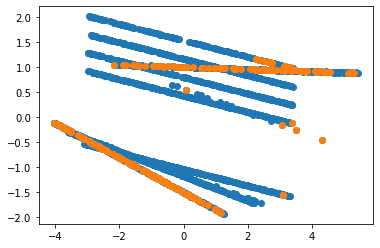

In [8]:
plt.scatter(train_pca[:,0], train_pca[:,1])
plt.scatter(train_pca[anom_index,0], train_pca[anom_index,1])

In [9]:
train_labeled = train.copy()
train_labeled["label"] = pd.Series([0]*train.shape[0])
train_labeled["label"].iloc[anom_index] = 1
train_labeled["label"]

C:\Users\Cedric\AppData\Local\Temp\ipykernel_8824\1831111049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_labeled["label"].iloc[anom_index] = 1


0       0
1       0
2       0
3       0
4       0
       ..
2458    0
2459    0
2460    0
2461    0
2462    0
Name: label, Length: 2463, dtype: int64

In [10]:
train_labeled[train_labeled["label"] ==1]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
74,3.30,63.66,0.7,42.69,3493.0,78.81,3.94,0,1
114,3.29,63.60,0.7,42.63,3488.0,78.76,3.94,0,1
186,3.30,63.66,0.7,42.69,3493.0,78.81,3.94,0,1
214,3.29,63.60,0.7,42.63,3488.0,78.76,3.94,0,1
585,1.91,58.00,0.7,27.28,3040.0,73.78,21.69,1,1
...,...,...,...,...,...,...,...,...,...
2380,2.95,59.03,0.7,38.16,3122.0,74.69,3.73,7,1
2391,3.28,63.41,0.7,42.45,3473.0,78.59,3.93,7,1
2419,3.12,61.33,0.7,40.41,3306.0,76.73,3.84,7,1
2439,3.26,63.16,0.7,42.20,3453.0,78.37,3.92,7,1


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import tensorflow_addons.metrics

c:\Users\Cedric\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Cedric\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure y

In [12]:
model = Sequential([
    layers.Dense(4, input_shape = (8,), activation = "relu"),
    layers.Dense(2, activation = "relu"),
    layers.Dense(4, activation = "relu"),   
    layers.Dense(6, activation = 'relu'),
    layers.Dense(8, activation = None)
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# tensorflow_addons.metrics.F1Score(num_classes=2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 6)                 30        
                                                                 
 dense_4 (Dense)             (None, 8)                 56        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


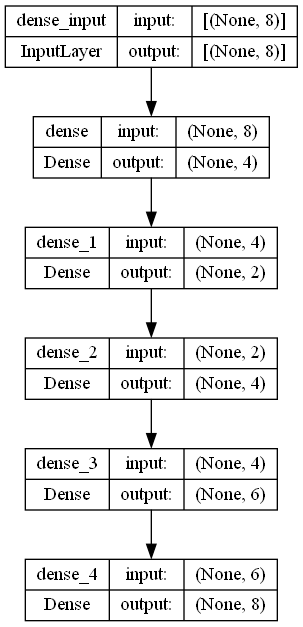

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [14]:
history = model.fit(train, train_labeled["label"], epochs= 800, batch_size= 100)

Epoch 1/800
25/25 [==============================] - 1s 667us/step - loss: 1.4780 - accuracy: 0.9042
Epoch 2/800
25/25 [==============================] - 0s 667us/step - loss: 1.4780 - accuracy: 0.9042
Epoch 3/800
25/25 [==============================] - 0s 667us/step - loss: 1.4780 - accuracy: 0.9042
Epoch 4/800
25/25 [==============================] - 0s 907us/step - loss: 1.4780 - accuracy: 0.9042
Epoch 5/800
25/25 [==============================] - 0s 710us/step - loss: 1.4780 - accuracy: 0.9042
Epoch 6/800
25/25 [==============================] - 0s 1ms/step - loss: 1.4780 - accuracy: 0.9042
Epoch 7/800
25/25 [==============================] - 0s 1ms/step - loss: 1.4780 - accuracy: 0.9042
Epoch 8/800
25/25 [==============================] - 0s 1ms/step - loss: 1.4780 - accuracy: 0.9042
Epoch 9/800
25/25 [==============================] - 0s 995us/step - loss: 1.4780 - accuracy: 0.9042
Epoch 10/800
25/25 [==============================] - 0s 1ms/step - loss: 1.4780 - accuracy: 0.90

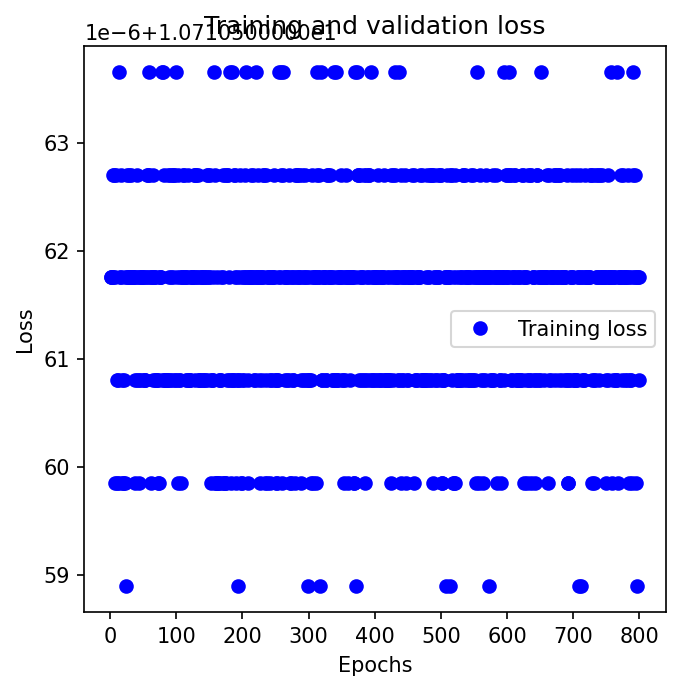

In [ ]:
loss = history.history["loss"]
# val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (5,5), dpi = 150)
plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss")
# plt.ylim([0, 0.1])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
predictions = model.predict(test)
submission["label"] = list(map(lambda x: 1 if x>= 0.5  else 0, predictions))
submission.to_csv("submission.csv", index= False)

231/231 [==============================] - 0s 712us/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()